In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path


DATA_DIR = "data"  # Relative path to your data directory
RAW_DATA_DIR = os.path.join(os.path.abspath('..'), os.path.join(DATA_DIR, "raw"))
PROCESSED_DATA_DIR = os.path.join(os.path.abspath('..'), os.path.join(DATA_DIR, "processed"))

# Load your data
data = pd.read_csv(os.path.join(PROCESSED_DATA_DIR,"combined_data.csv"))


In [2]:
# 1. Descriptive Statistics:
print(data.describe())  # Summary statistics (mean, std, min, max, etc.)
print(data.info())  # Data types, non-null counts


            track_id       bit_rate     comments     duration    favorites  \
count    4802.000000    4802.000000  4802.000000  4802.000000  4802.000000   
mean    30164.871720  246125.992503     0.027697   229.256768     2.008746   
std     28592.013796   56789.007268     0.418614   190.619206     9.671264   
min         2.000000      -1.000000     0.000000    18.000000     0.000000   
25%      7494.250000  197678.750000     0.000000   144.000000     0.000000   
50%     20723.500000  256000.000000     0.000000   198.000000     1.000000   
75%     44240.750000  256000.000000     0.000000   261.000000     2.000000   
max    124722.000000  448000.000000    24.000000  3033.000000   554.000000   

           interest        listens       number  acousticness  danceability  \
count  4.802000e+03    4802.000000  4802.000000  4.802000e+03   4802.000000   
mean   1.913525e+03    1091.146189     5.757185  4.870600e-01      0.436556   
std    1.631005e+04    7490.835102     5.661765  3.681396e-0

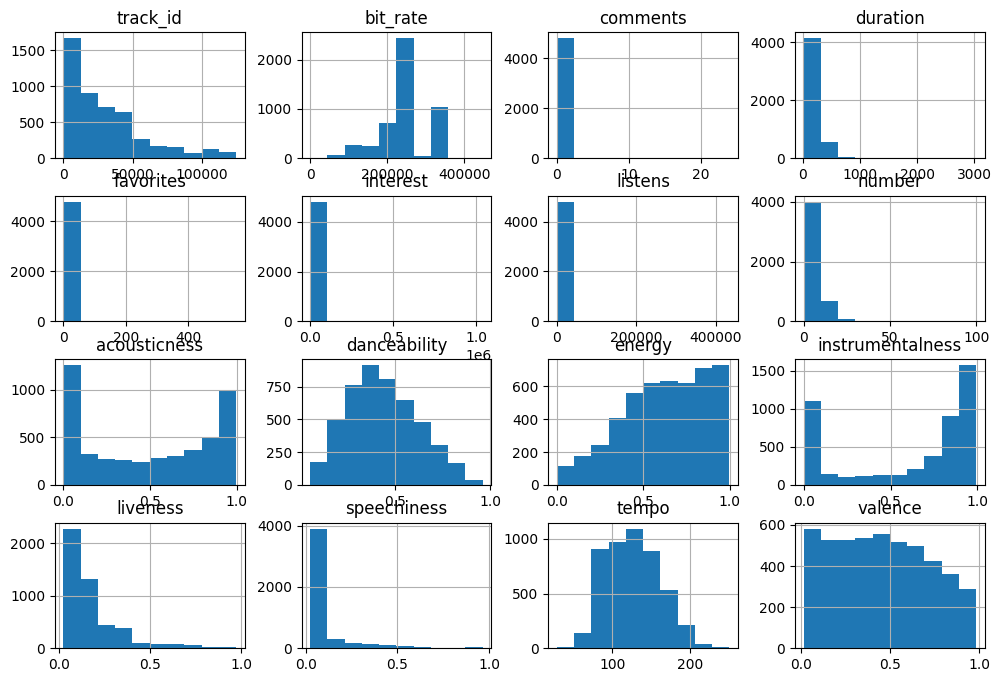

In [3]:
# 2. Visualizing Distributions:
# Histograms for numerical features
data.hist(figsize=(12, 8))
plt.show()


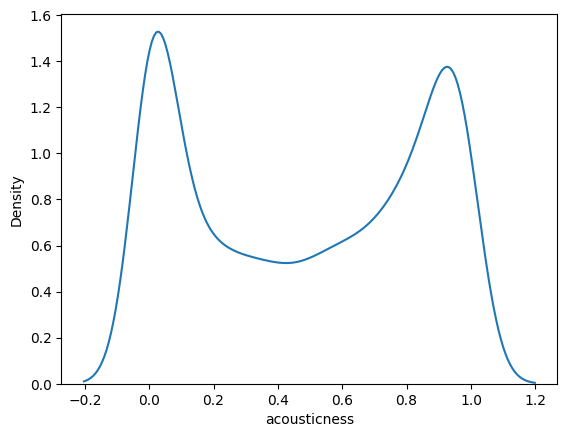

In [4]:
# Density plots for a closer look at distributions
sns.kdeplot(data=data, x='acousticness')  # Example feature
plt.show()

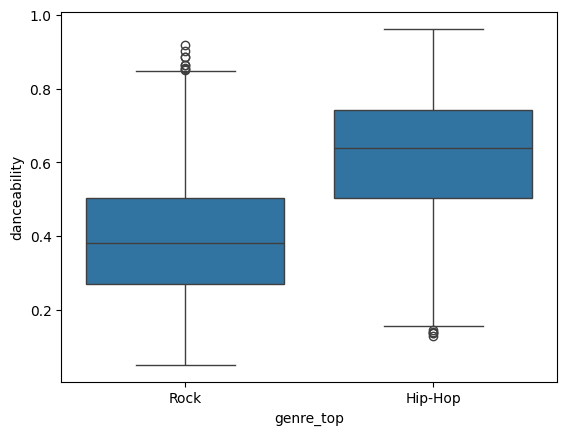

In [5]:
# Box plots to visualize distributions by genre
sns.boxplot(x='genre_top', y='danceability', data=data)
plt.show()

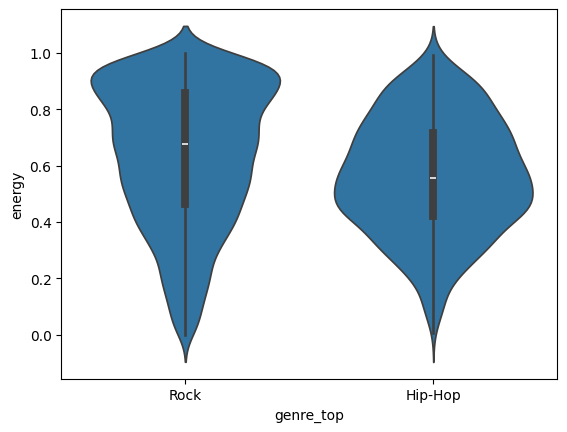

In [6]:
# Violin plots (combination of box plot and kernel density estimate)
sns.violinplot(x='genre_top', y='energy', data=data)
plt.show()

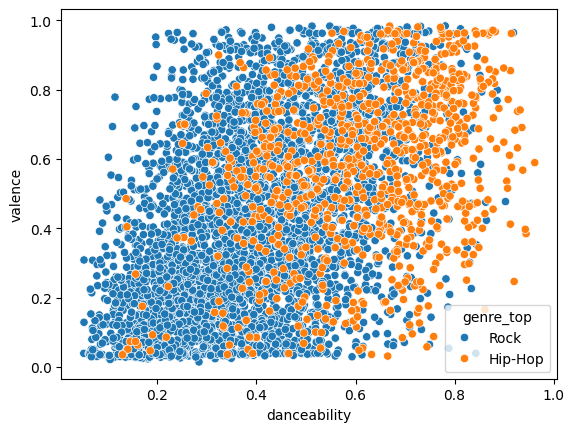

In [7]:
# 3. Exploring Relationships between Features:
# Scatter plots to visualize relationships between pairs of numerical features
sns.scatterplot(x='danceability', y='valence', hue='genre_top', data=data)  # Example
plt.show()

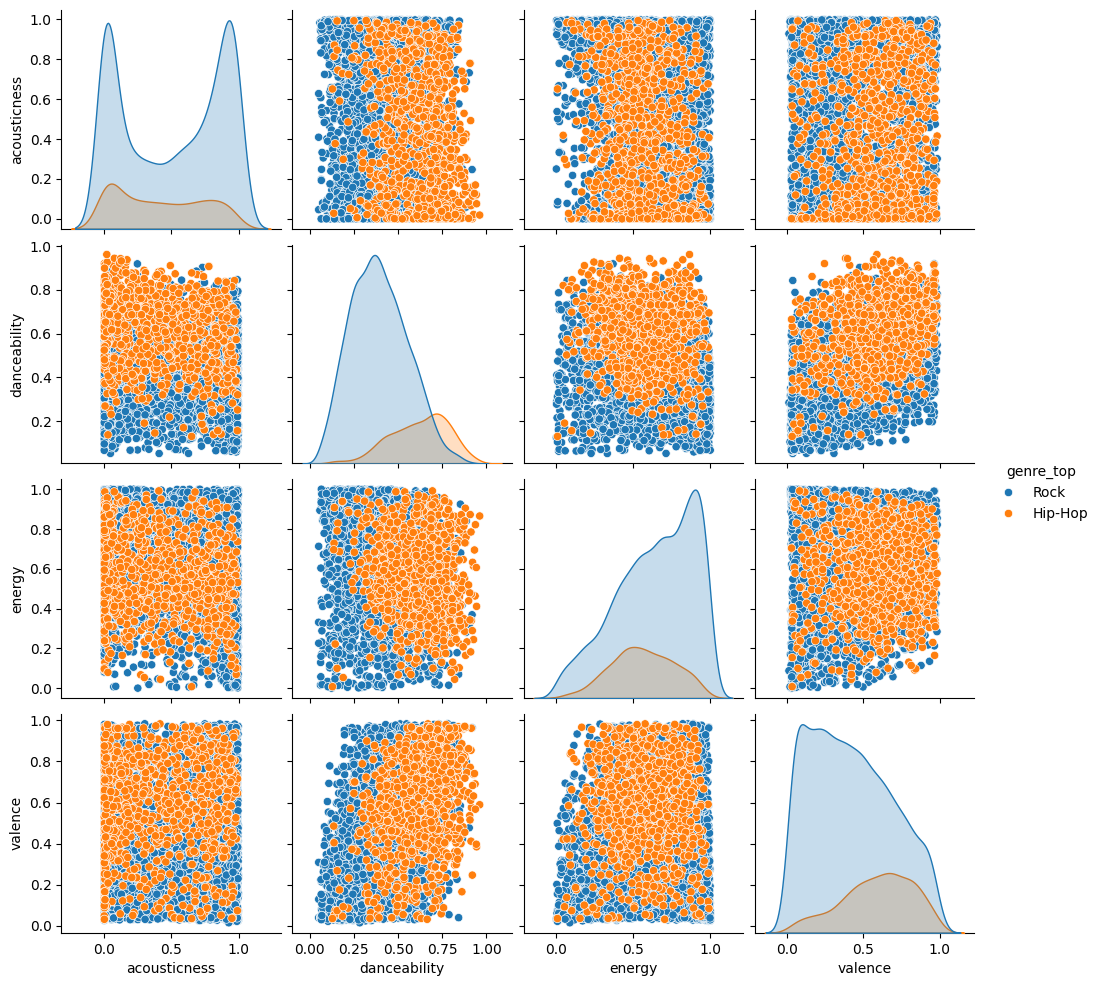

In [8]:
# Pair plots to visualize relationships between all pairs of numerical features
sns.pairplot(data, hue='genre_top', vars=['acousticness', 'danceability', 'energy', 'valence']) # Select some features
plt.show()

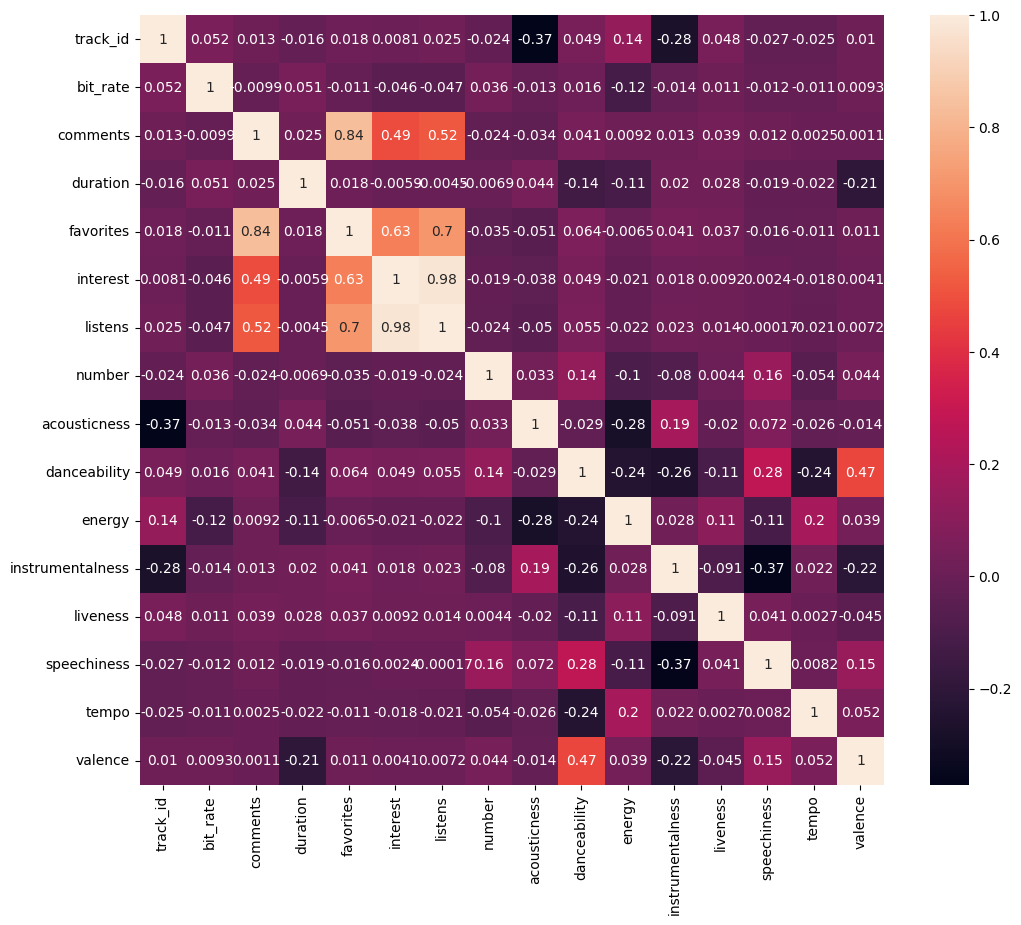

In [9]:
# Correlation matrix heatmap
#correlation_matrix = data.corr()
#sns.heatmap(correlation_matrix, annot=True)
#plt.show()

numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr(method="pearson")
#sns.heatmap(correlation_matrix, annot=True)
plt.figure(figsize=(12, 10))  # Adjust width and height as needed
sns.heatmap(correlation_matrix, annot=True)
plt.show()

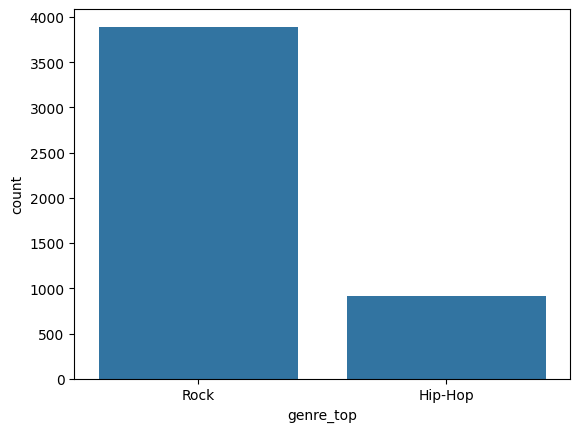

In [10]:
# 4. Exploring Categorical Features:
# Count plots to show the distribution of categorical features
sns.countplot(x='genre_top', data=data)  # Example feature 'genre_top'
plt.show()

C:\Projects\MusicGenreClassifier\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


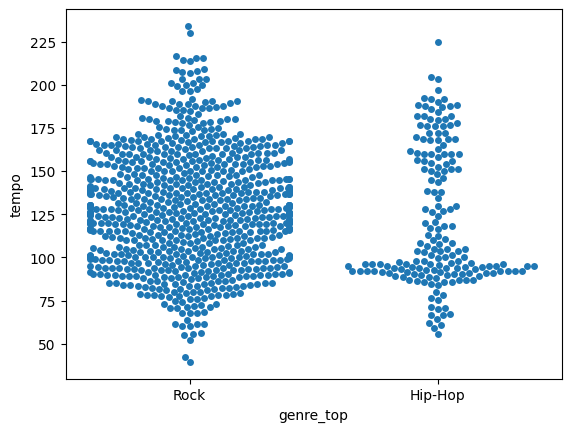

In [11]:
# 5. Advanced Visualizations:
# Swarm plots for visualizing distributions by category
#sns.swarmplot(x="genre_top", y="tempo", data=data)
#plt.show()
#sns.swarmplot(x="genre_top", y="tempo", data=data, size=2)  # Adjust size as needed
#plt.show()
sampled_data = data.sample(frac=0.2, random_state=42) # Sample 20% of data
sns.swarmplot(x="genre_top", y="tempo", data=sampled_data)
plt.show()

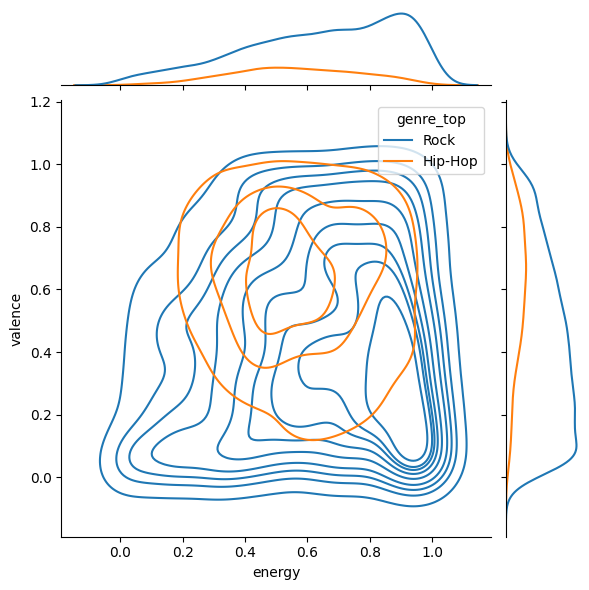

In [12]:
# Joint plots for scatter plots with distributions on the axes
sns.jointplot(x='energy', y='valence', data=data, kind='kde', hue='genre_top') #'kde' or others
plt.show()